<a href="https://colab.research.google.com/github/and06/junk-man-model/blob/main/JunkMan_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convulotional Neural Network(CNN)

# **Import Library**

In [ ]:
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import shutil
import os
import zipfile
print(tf.__version__)
%matplotlib inline

2.5.0


# **Fungsi Callback**

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
      if(logs.get('accuracy')> 0.95):
        print("\nAkurasi yang diperoleh sudah baik, training dihentikan!")   
        self.model.stop_training = True

In [ ]:
callbacks = myCallback()

# **TRANSFER LEARNING**

MobilenetV2

In [ ]:
pre_trained_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = "imagenet" )

for layer in pre_trained_model.layers:
  layer.trainable = False

last_output = pre_trained_model.output
x = layers.Conv2D(1280,(3,3), activation='relu')(last_output)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(5, activation='softmax')(x)  
model = Model(pre_trained_model.input,x)    

#**Extract File**

In [ ]:
import zipfile,os
local_zip = 'dataset-resized.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/'
mix_dir = os.path.join(base_dir, 'dataset-resized')

##**Prepocessing Data**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    brightness_range=[0.2,1.0],
    rotation_range=40,
    width_shift_range=[-0.2,0.2],
    height_shift_range=[-0.2,0.2],
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.4) # Data validation 0.4(40%)
    
validation_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.4) # Data validation 0.4(40%)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    mix_dir,
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    mix_dir,
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    subset='validation')

Found 1476 images belonging to 5 classes.
Found 980 images belonging to 5 classes.


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs= 50,
    validation_data=validation_generator,
    validation_steps = 50, 
    shuffle=True, 
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/50
50/50 [==============================] - 77s 1s/step - loss: 1.7662 - accuracy: 0.3891 - val_loss: 1.2603 - val_accuracy: 0.5340
Epoch 2/50
50/50 [==============================] - 73s 1s/step - loss: 1.3167 - accuracy: 0.5202 - val_loss: 1.1179 - val_accuracy: 0.6040
Epoch 3/50
50/50 [==============================] - 71s 1s/step - loss: 1.1246 - accuracy: 0.5580 - val_loss: 0.9363 - val_accuracy: 0.6520
Epoch 4/50
50/50 [==============================] - 71s 1s/step - loss: 1.0116 - accuracy: 0.6109 - val_loss: 0.9882 - val_accuracy: 0.6460
Epoch 5/50
50/50 [==============================] - 72s 1s/step - loss: 1.0342 - accuracy: 0.6080 - val_loss: 0.9099 - val_accuracy: 0.6740
Epoch 6/50
50/50 [==============================] - 71s 1s/step - loss: 0.8505 - accuracy: 0.6600 - val_loss: 0.8952 - val_accuracy: 0.6580
Epoch 7/50
50/50 [==============================] - 71s 1s/step - loss: 0.7935 - accuracy: 0.6920 - val_loss: 0.7969 - val_accuracy: 0.7000
Epoch 8/50
50/50 [==

#**Prediksi**

In [ ]:
import cv2
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)/255
  x = np.expand_dims(x, axis=0)
  print(x)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)
  print(classes)  
  max = np.argmax(classes,axis=1)
  if max==0:
    print('Cardboard')
  elif max==1:
    print('Glass')
  elif max==2:
    print('Metal')   
  elif max==3:
    print('Paper')   
  elif max==4:
    print('Plastic')    
  else:
    print('Lain')   



Hasil Keluaran Lainnya :

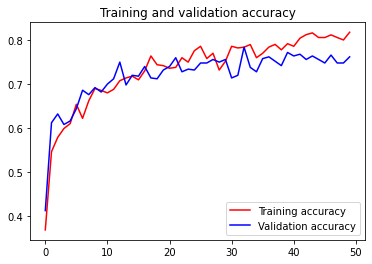

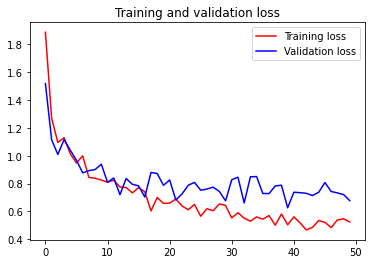

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()


In [ ]:
from tensorflow import keras
tf_file = "Junkman_modelv2.h5"
keras.models.save_model(model,tf_file)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
def represent_data_gen():
  for ind in range(len(validation_generator.filenames)):
    img_with_label = validation_generator.next()
    yield [np.array(img_with_label[0],dtype=np.float32,ndmin=2)]

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset=represent_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8  # or tf.uint8
converter.inference_output_type = tf.uint8  # or tf.uint8
tflite_model = converter.convert()
tflite_no_quant="junkman.tflite"
with open(tflite_no_quant,"wb") as f:
  f.write(tflite_model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmp5l4zwd2y/assets


INFO:tensorflow:Assets written to: /tmp/tmp5l4zwd2y/assets


# **GENERATE A SAVEDMODEL**